## Project: Data Wrangling by Mbelenga Stephen

## Introduction
 - In this data wrangling project I will gather, assess and clean twitter posts from WeRateDogs

## Steps Include;

 #### Gathering data

 #### Assessing data

 #### Cleaning data

 #### Storing data

 #### Analyzing, and visualizing data

 #### Reporting

  - data wrangling efforts
  - data analyses and visualizations

## Gathering data

- Install & Import all the required libraries for the project.
- Load and Download the required datasets as per the guidelines.
  

In [119]:
# Libraries to Use

import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import configparser
import json
import time
import seaborn as sns
import warnings; warnings.simplefilter('ignore')


In [2]:
# pip install tweepy

In [2]:
# load the twiter-archive-enhanced.csv file into a dataframe

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Use requests module to download items from image-prediction.tsv and save it to a file 


images_folder = 'image_predictions'
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)
response

with open(os.path.join(images_folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [3]:
# Open the image-prediction.tsv file and save it in a dataframe and check whether the process was successful by reading the first five entries.

image_predictions = pd.read_table('image_predictions/image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Query Twitter API for each Tweet's JSON Data Using Tweepy Access Library and store each set in a JSON Data file.

In [4]:
# Saved my tweeter api key, api secret key, access token and access token secret into a config.txt file  

# read config.txt file

config = configparser.ConfigParser()
config.read('config.txt')


api_key = config['twitter']['api_key']
api_secret_key = config['twitter']['api_secret_key']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']


In [5]:
# Authentication

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit= True)

### References:

- https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1
- https://docs.tweepy.org/en/stable/api.html

In [ ]:
# Twitter querying using the tweet_id from twitter_archived.df

# this starts the timer
start_time = time.time()

tweet_ids = twitter_archive.tweet_id.values

tweets_data = []
tweets_errors = []

for tweet_id in tweet_ids:
        try:
            results = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit= True)
            tweet_info = results._json
            tweets_data.append(tweet_info)
        except:
            tweets_errors.append(tweet_id)
            print(tweet_id)

# this stops the timer            
end_time = time.time()

print(end_time - start_time)

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


892177421306343426


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


890729181411237888


Unexpected parameter: wait_on_rate_limit


890609185150312448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


888202515573088257


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

873697596434513921


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


872668790621863937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


872261713294495745


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


869988702071779329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


866816280283807744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


861769973181624320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


858471635011153920


Unexpected parameter: wait_on_rate_limit


858107933456039936


Unexpected parameter: wait_on_rate_limit


857989990357356544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


856602993587888130


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


856330835276025856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


855818117272018944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


851953902622658560


Unexpected parameter: wait_on_rate_limit


851861385021730816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

845459076796616705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


844704788403113984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


842892208864923648


Unexpected parameter: wait_on_rate_limit


842846295480000512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


841320156043304961


Unexpected parameter: wait_on_rate_limit


841314665196081154


Unexpected parameter: wait_on_rate_limit


841077006473256960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

837366284874571778


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


837012587749474308


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

829501995190984704


Unexpected parameter: wait_on_rate_limit


829449946868879360


Unexpected parameter: wait_on_rate_limit


829374341691346946


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


827228250799742977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


826598799820865537


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

822610361945911296


Unexpected parameter: wait_on_rate_limit


822489057087389700


Unexpected parameter: wait_on_rate_limit


822462944365645825


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


820690176645140481


Unexpected parameter: wait_on_rate_limit


820494788566847489


Unexpected parameter: wait_on_rate_limit


820446719150292993


Unexpected parameter: wait_on_rate_limit


820314633777061888


Unexpected parameter: wait_on_rate_limit


820078625395449857


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


819015337530290176


Unexpected parameter: wait_on_rate_limit


819015331746349057


Unexpected parameter: wait_on_rate_limit


819006400881917954


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


818259473185828864


Unexpected parameter: wait_on_rate_limit


818145370475810820


Unexpected parameter: wait_on_rate_limit


817908911860748288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


816091915477250048


Unexpected parameter: wait_on_rate_limit


816062466425819140


Unexpected parameter: wait_on_rate_limit


816014286006976512


Unexpected parameter: wait_on_rate_limit


815990720817401858


Unexpected parameter: wait_on_rate_limit


815966073409433600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

812747805718642688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


811627233043480576


Unexpected parameter: wait_on_rate_limit


811386762094317568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

802247111496568832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

796865951799083009


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


796484825502875648


Unexpected parameter: wait_on_rate_limit


796387464403357696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

789628658055020548


Unexpected parameter: wait_on_rate_limit


789599242079838210


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


789280767834746880


Unexpected parameter: wait_on_rate_limit


789268448748703744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

785533386513321988


Unexpected parameter: wait_on_rate_limit


785515384317313025


Unexpected parameter: wait_on_rate_limit


785264754247995392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


784431430411685888


Unexpected parameter: wait_on_rate_limit


784183165795655680


Unexpected parameter: wait_on_rate_limit


784057939640352768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


782747134529531904


Unexpected parameter: wait_on_rate_limit


782722598790725632


Unexpected parameter: wait_on_rate_limit


782598640137187329


Unexpected parameter: wait_on_rate_limit


782305867769217024


Unexpected parameter: wait_on_rate_limit


782021823840026624


Unexpected parameter: wait_on_rate_limit


781955203444699136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


780476555013349377


Unexpected parameter: wait_on_rate_limit


780459368902959104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


779123168116150273


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


777953400541634568


Unexpected parameter: wait_on_rate_limit


777885040357281792


Unexpected parameter: wait_on_rate_limit


777684233540206592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


775096608509886464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

771004394259247104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


770743923962707968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


767500508068192258


Unexpected parameter: wait_on_rate_limit


767191397493538821


Unexpected parameter: wait_on_rate_limit


767122157629476866


Unexpected parameter: wait_on_rate_limit


766864461642756096


Unexpected parameter: wait_on_rate_limit


766793450729734144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

759923798737051648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


759566828574212096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

754011816964026368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

738537504001953792


Unexpected parameter: wait_on_rate_limit


738402415918125056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


737445876994609152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


736736130620620800


Unexpected parameter: wait_on_rate_limit


736392552031657984


Unexpected parameter: wait_on_rate_limit


736365877722001409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

697995514407682048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

680055455951884288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


679777920601223168


Unexpected parameter: wait_on_rate_limit


679736210798047232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


679722016581222400


Unexpected parameter: wait_on_rate_limit


679530280114372609


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

676582956622721024


Unexpected parameter: wait_on_rate_limit


676575501977128964


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

672622327801233409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


In [10]:
# Create 'tweet_json.txt' file.

file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    open(file_name, 'w').close()

# Write to 'tweet_json.txt' file

with open(file_name, 'w', encoding='utf-8') as file:
                json.dump(tweets_data, file, ensure_ascii=False, indent=4)

In [11]:
# Extract the Twitter API data from file to a list

tweet_list = []

with open(file_name, encoding='utf-8') as file:
    tweets = json.load(file)
    for tweet in tweets:
        tweet_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count']})

# tweet_list       


In [12]:
# Create a dataframe from tweet_list

tweets_df = pd.DataFrame(tweet_list,
                         columns = ['tweet_id', 
                                    'retweet_count', 
                                    'favorite_count'])





In [13]:
# check the first 5 entries

print(tweets_df.shape)
tweets_df.head()


(2283, 3)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29331
2,891815181378084864,3481,22052
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311


In [14]:
# Check the last 5 entries
tweets_df.tail()

,tweet_id,retweet_count,favorite_count
2278,666049248165822465,37,89
2279,666044226329800704,115,247
2280,666033412701032449,36,100
2281,666029285002620928,39,112
2282,666020888022790149,423,2293


### Reference: 

- https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file
- https://stackoverflow.com/questions/71590362/json-unicodedecodeerror-charmap-codec-cant-decode-byte-0x8d-in-position-3621

### Assessing Data

In [15]:
# twitter_archive

# Check for NaN Values

twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Insight:

- There are many NaN values in the twitter_achive data 

In [16]:
# Check for dog names

twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Insight:
- There are no duplicate values in twitter_archive.

In [17]:
# A quick summary about the dataframe

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# images_predictions

# Check for NaN Values

image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Insight
*There are no null values in image_predictions*

In [19]:
# Check for duplicate entries in various columns.

print(image_predictions['jpg_url'].duplicated().sum())
print(image_predictions['img_num'].duplicated().sum())
print(image_predictions['p1'].duplicated().sum())
print(image_predictions['p1_conf'].duplicated().sum())
print(image_predictions['p1_dog'].duplicated().sum())
print(image_predictions['p2'].duplicated().sum())
print(image_predictions['p2_conf'].duplicated().sum())
print(image_predictions['p2_dog'].duplicated().sum())
print(image_predictions['p3'].duplicated().sum())
print(image_predictions['p3_conf'].duplicated().sum())
print(image_predictions['p3_dog'].duplicated().sum())


66
2071
1697
69
2073
1670
71
2073
1667
69
2073


### Insight

- There are different duplicate values in various columns.

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Check for images that are not dogs

image_predictions.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [22]:
# tweets_df

# ckeck for NaN Values

tweets_df.isna().values.any()

False

In [23]:
# Check for duplicates

print(tweets_df['tweet_id'].duplicated().sum())
print(tweets_df['retweet_count'].duplicated().sum())
print(tweets_df['favorite_count'].duplicated().sum())

0
645
358


In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2283 non-null   int64
 1   retweet_count   2283 non-null   int64
 2   favorite_count  2283 non-null   int64
dtypes: int64(3)
memory usage: 53.6 KB


### Detect and document at least eight (8) quality issues and two (2) tidiness issues.

##### Quality Issues:

*twitter_archive*

- Many Missing records and NaN values in twitter_archive.
- Inaccurate datatype in some columns for example tweet_id column is an int datatype.
- Inacurrate dog names 'None', 'a'.
- Convert timestamp column, object datatype to a datetime datatype.
- Many duplicate values in the table.

*image_predictions*

- Entries that have p1_dog, p2_dog, & p3_dog values set to false.
- Duplicate jpg_url entries.
- Incorrect datatype for tweet_id.


*tweets_df*

- tweet_id is an object datatype.

*All tables*

- Convert tweet_id columns to a string datatype.
- Assess any further issues that may arise.


#### Tidiness Issues:

- Combine the four (4) dog stage columns into a single column in the twitter_archive.
- Join all the three (3) datasets to a single dataset i.e twitter_achive_master.csv. 

### Cleaning Data



In [51]:
# create copies of original data

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_clean = tweets_df.copy()

#### Define

- Drop extraneous columns in the twitter_archive table. 

#### Code


In [52]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'], axis=1)

#### Test

In [53]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

- Convert timestamp column from object datatype to datetime datatype.
- Create a date column and drop timestamp column.

#### Code

In [54]:

# convert the timestamp column to datetime

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], yearfirst= True)

#### Test

In [55]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [39]:
# create a date column and drop the timestamp column.

twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))

twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

In [40]:
twitter_archive_clean.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01


#### Define

- Lowercase dog names and None. Replace them with NaN.

#### Code

In [57]:
(twitter_archive_clean.name == "None").sum()

745

In [58]:
# lowercase dog names and 'None'
dog_names = list(twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.value_counts().index)
dog_names.append('None')
dog_names

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'old',
 'life',
 'officially',
 'light',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'his',
 'my',
 'incredibly',
 'space',
 'None']

In [51]:
# replace lowercase names and 'None' with NaN

twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(dog_names, np.nan)

#### Test

In [52]:
twitter_archive_clean.name.value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
              ..
Bayley         1
Meatball       1
Storkson       1
Remy           1
Christoper     1
Name: name, Length: 948, dtype: int64

#### Define

- Search for dog names that start with named and extract the names. 

#### Code

In [59]:
extracted_names = twitter_archive_clean[twitter_archive_clean.name.str.match('a')].text.str.extract(r'(named\s\w+)').dropna()
extracted_names

,0
1853,named Wylie
1955,named Kip
2034,named Jacob
2066,named Rufus
2116,named Spork
2125,named Cherokee
2128,named Hemry
2146,named Alphred
2161,named Alfredo
2191,named Leroi


In [60]:
# Remove the 'named' word and remain with the dog name.

twitter_archive_clean.loc[extracted_names.index, 'name'] = extracted_names[0].str.slice(6)

#### Test

In [61]:
twitter_archive_clean[twitter_archive_clean.name.str.match('a')].text.str.contains('named ')

56      False
649     False
759     False
801     False
1002    False
1004    False
1017    False
1025    False
1040    False
1049    False
1138    False
1193    False
1207    False
1340    False
1351    False
1361    False
1362    False
1368    False
1382    False
1499    False
1693    False
1737    False
1785    False
1854    False
1877    False
1878    False
1923    False
1941    False
1994    False
2153    False
2198    False
2211    False
2222    False
2287    False
2327    False
2333    False
2334    False
2335    False
2347    False
2348    False
2349    False
2350    False
2352    False
2353    False
2354    False
Name: text, dtype: bool

#### Define

- Convert tweet_id int  datatype to object.

#### Code


In [62]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [63]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

#### Define

- Define a function to remove HTML Link on source column.

#### Code

In [64]:
# Function

def remove_url(x):
    return x.split('>', 1)[-1][:-4]

# apply.

twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(remove_url)

#### Test



In [65]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define

- Keep rows with rating numerator between 1 and 15 and rating denominator between 1 and 10. 

#### Code

In [66]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.rating_numerator > 0) & (twitter_archive_clean.rating_numerator <= 15) &
                          (twitter_archive_clean.rating_denominator <= 10)]

#### Test

In [67]:
twitter_archive_clean['rating_numerator'].value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
14     54
7      54
5      37
6      32
3      19
4      15
1       9
2       9
15      2
Name: rating_numerator, dtype: int64

In [68]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2321
2        1
Name: rating_denominator, dtype: int64

#### Define

- Convert rating numerator and rating denominator to float data type.

#### Code

In [69]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

In [70]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [71]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### Define

- Combine columns doggo, floofer, pupper, puppo into one column dog_stage.

#### Code

In [72]:
# replace all NaN and 'None' dog stage with an empty value.

twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [73]:
# use group by.
twitter_archive_clean.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,1943
1,,,,puppo,29
2,,,pupper,,244
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [74]:
# combine dog stages to a single column

twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# combine multiple stage rows

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [75]:
# drop previous dog stage columns

twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [76]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1832,676191832485810177,2015-12-14 00:07:50+00:00,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,10.0,10.0,None,
2305,666837028449972224,2015-11-18 04:35:11+00:00,Twitter for iPhone,My goodness. Very rare dog here. Large. Tail d...,https://twitter.com/dog_rates/status/666837028...,3.0,10.0,None,
504,813051746834595840,2016-12-25 16:00:16+00:00,Twitter for iPhone,This is Bauer. He had nothing to do with the c...,https://twitter.com/dog_rates/status/813051746...,13.0,10.0,Bauer,
1551,689143371370250240,2016-01-18 17:52:38+00:00,Twitter for iPhone,Meet Trip. He likes wearing costumes that aren...,https://twitter.com/dog_rates/status/689143371...,10.0,10.0,Trip,pupper
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,


In [77]:
twitter_archive_clean['dog_stage'].value_counts()

                  1943
pupper             244
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

#### Define

- Remove the p1_dog, p2_dog and P3_dog entries which are false.

#### Code

In [78]:
image_predictions_clean = image_predictions_clean.query('(p1_dog != False) and (p2_dog != False) and (p3_dog != False)')

#### Test

In [79]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   int64  
 1   jpg_url   1243 non-null   object 
 2   img_num   1243 non-null   int64  
 3   p1        1243 non-null   object 
 4   p1_conf   1243 non-null   float64
 5   p1_dog    1243 non-null   bool   
 6   p2        1243 non-null   object 
 7   p2_conf   1243 non-null   float64
 8   p2_dog    1243 non-null   bool   
 9   p3        1243 non-null   object 
 10  p3_conf   1243 non-null   float64
 11  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


#### Define

- Convert tweet_id from int to object datatype.

#### Code

In [81]:
tweets_clean.tweet_id = tweets_clean['tweet_id'].astype(str)

#### Test

In [82]:
tweets_clean['tweet_id'].dtype

dtype('O')

#### Define

- Merge tweets_clean and twitter_archive_clean.

#### Code

In [84]:
twitter_archive_clean_df = pd.merge(twitter_archive_clean, tweets_clean, on='tweet_id', how='left')

#### Test

In [86]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2321
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2322 non-null   object             
 1   timestamp           2322 non-null   datetime64[ns, UTC]
 2   source              2322 non-null   object             
 3   text                2322 non-null   object             
 4   expanded_urls       2271 non-null   object             
 5   rating_numerator    2322 non-null   float64            
 6   rating_denominator  2322 non-null   float64            
 7   name                2322 non-null   object             
 8   dog_stage           2322 non-null   object             
 9   retweet_count       2205 non-null   float64            
 10  favorite_count      2205 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 217.7+ KB


In [87]:
twitter_archive_clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,7009.0,33809.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,3481.0,22052.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,7225.0,36938.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,7760.0,35311.0


#### Storing

#### Define

- Save the 2 files to csv format.

#### Code

In [89]:
twitter_archive_clean_df.to_csv('twitter_archive_master.csv', index=False)
image_predictions_clean.to_csv('image_predictions_master.csv', index=False)

### Analysing and Visualizing Data

In [90]:
twitter_df = pd.read_csv('twitter_archive_master.csv')

In [91]:
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,7009.0,33809.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,3481.0,22052.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,7225.0,36938.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,7760.0,35311.0


#### Bar Chart

- Dog stage with high average count.

In [123]:
avg_dog_stage_count = twitter_df[['dog_stage', 'favorite_count']]
avg_dog_stage_count = avg_dog_stage_count.query('dog_stage != ""')
avg_dog_stage_count = avg_dog_stage_count.groupby('dog_stage').mean()

x_pos = list(avg_dog_stage_count.index.str.capitalize())
y_pos = list(avg_dog_stage_count.favorite_count)


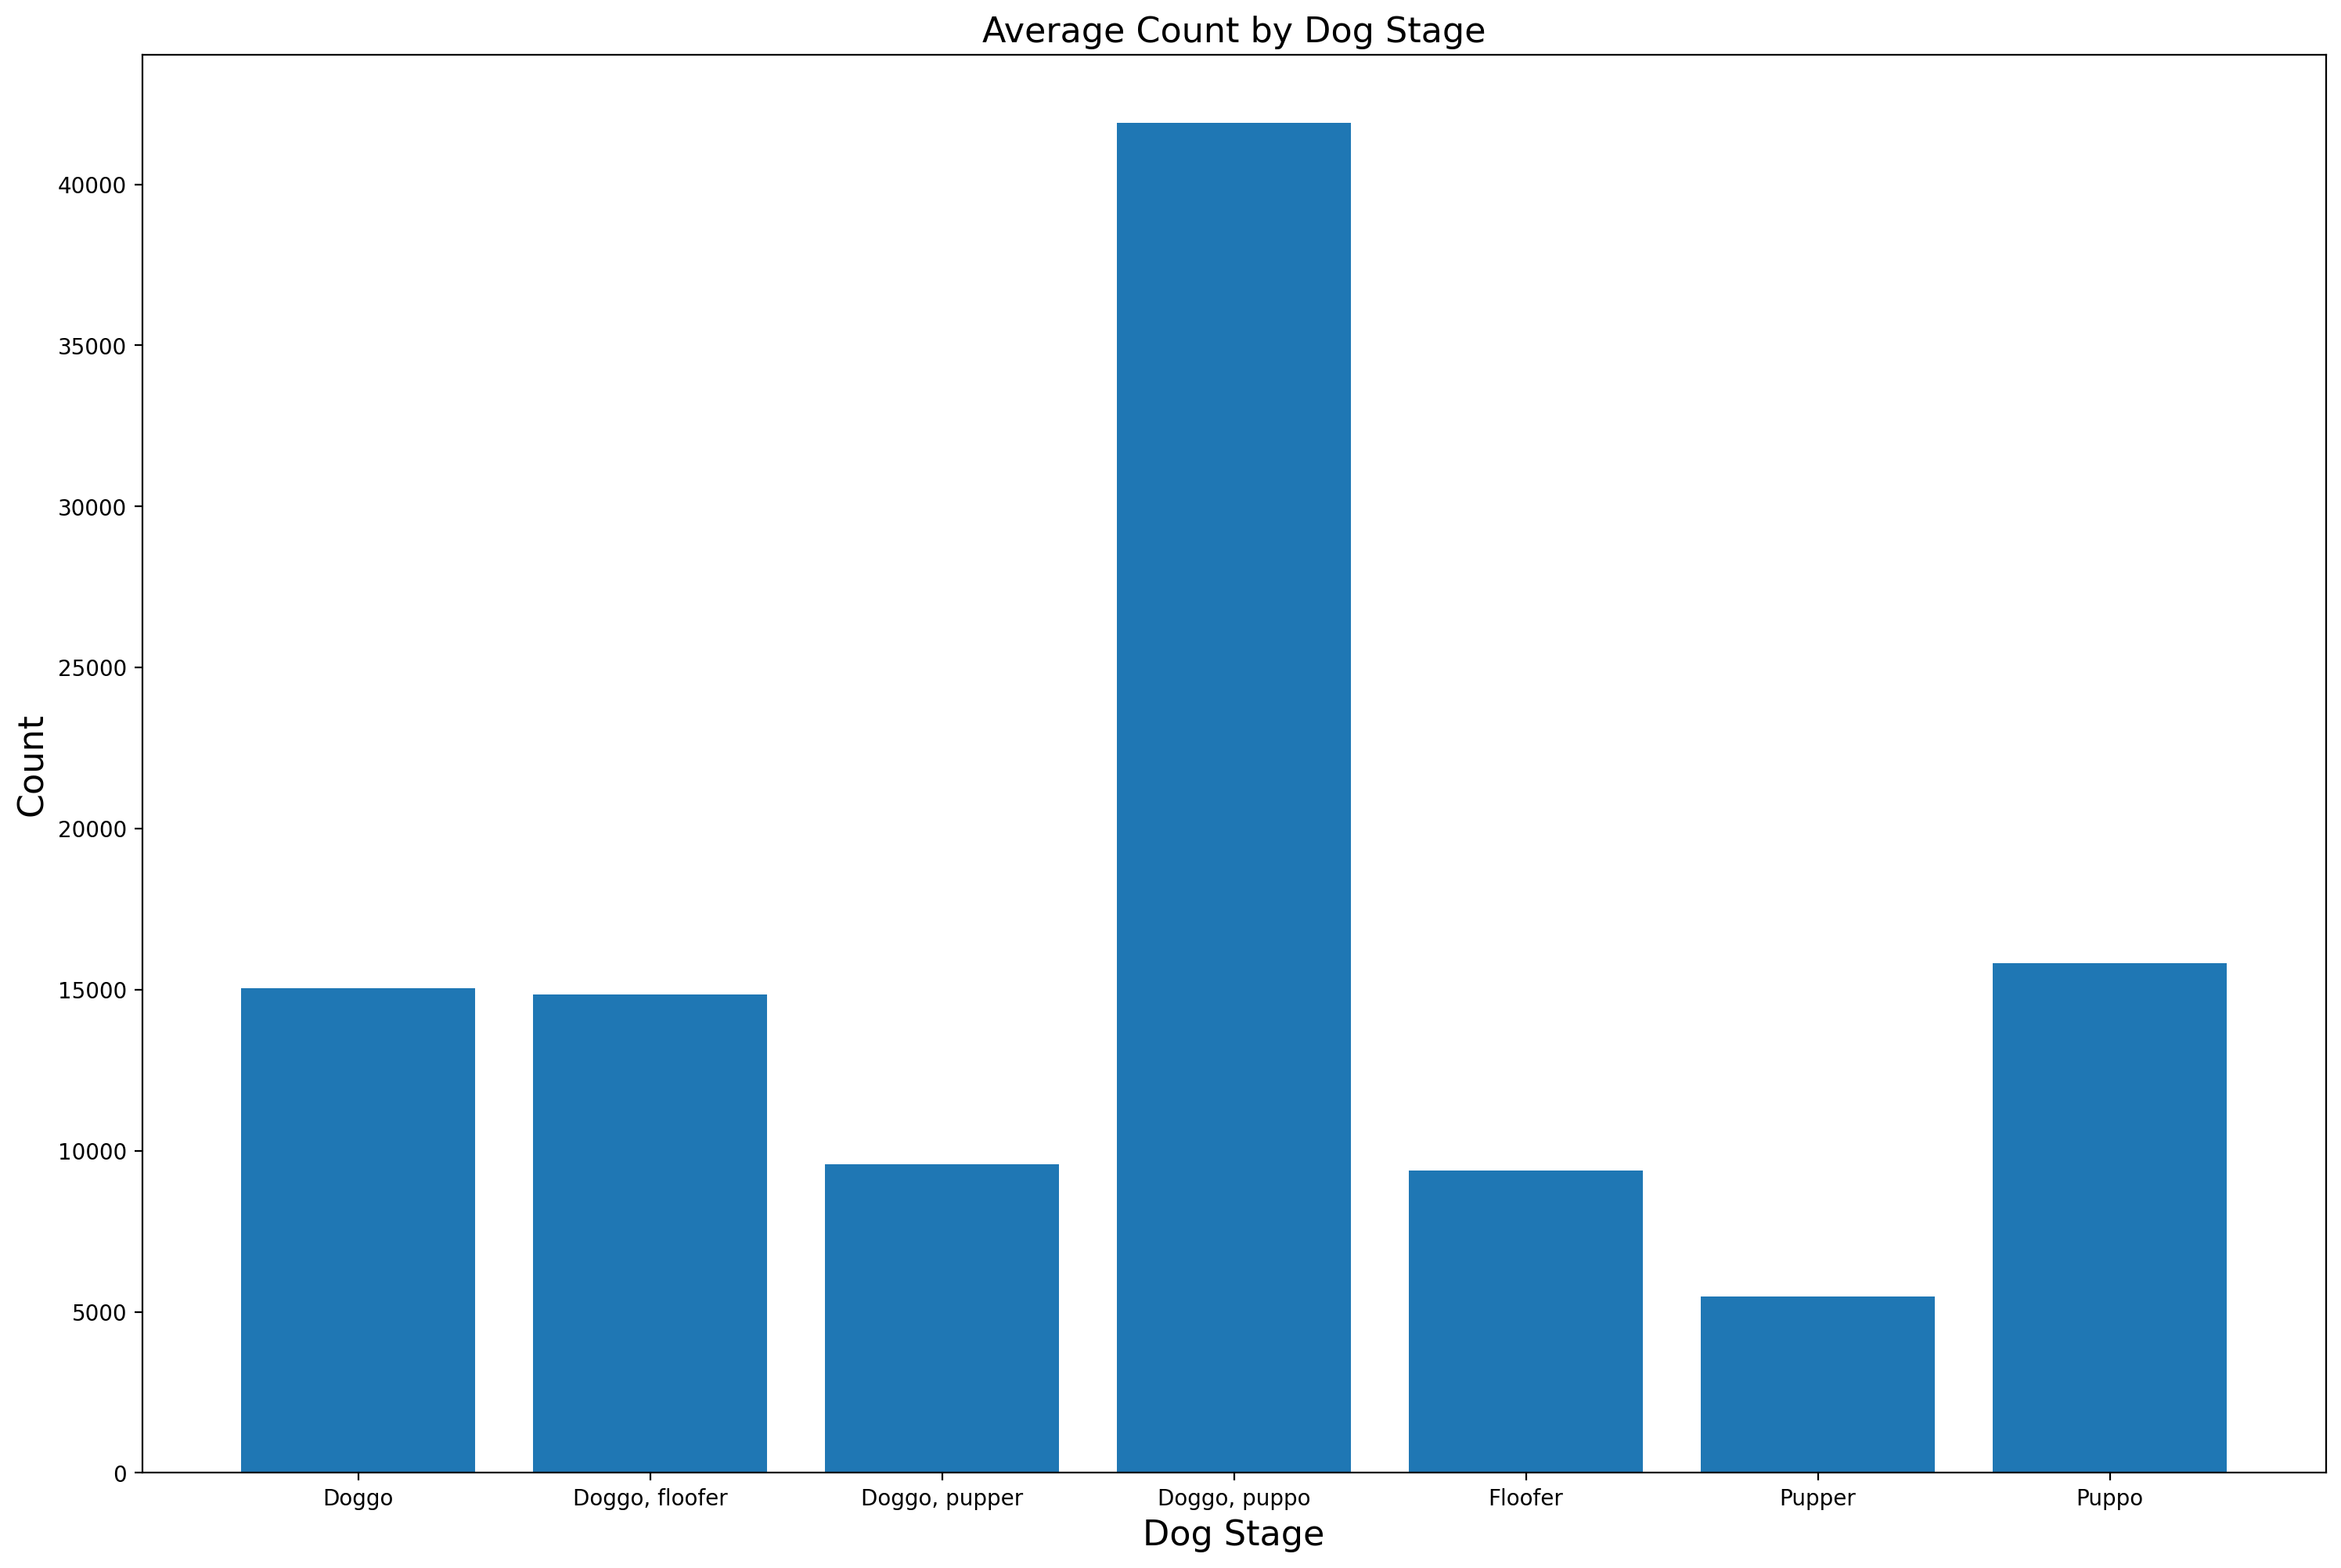

In [128]:
# plot a bar graph

plt.figure(figsize=(18, 12), dpi=200)
plt.title('Average Count by Dog Stage', fontsize=16)
plt.xlabel('Dog Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.bar(x_pos, y_pos)
plt.savefig('avg_dog_stage_count.png');

#### Plot a Scatter Plot

In [114]:
# sort timestamp, favorites, and retweets
results = twitter_df[['timestamp', 'favorite_count', 'retweet_count']].sort_values(['timestamp', 'favorite_count'])

In [115]:
# Create moving average

window = 30
rolling_favourite_count = results.favorite_count.rolling(window=window).mean()[window-1:]
rolling_retweets_count = results.retweet_count.rolling(window=window).mean()[window-1:]

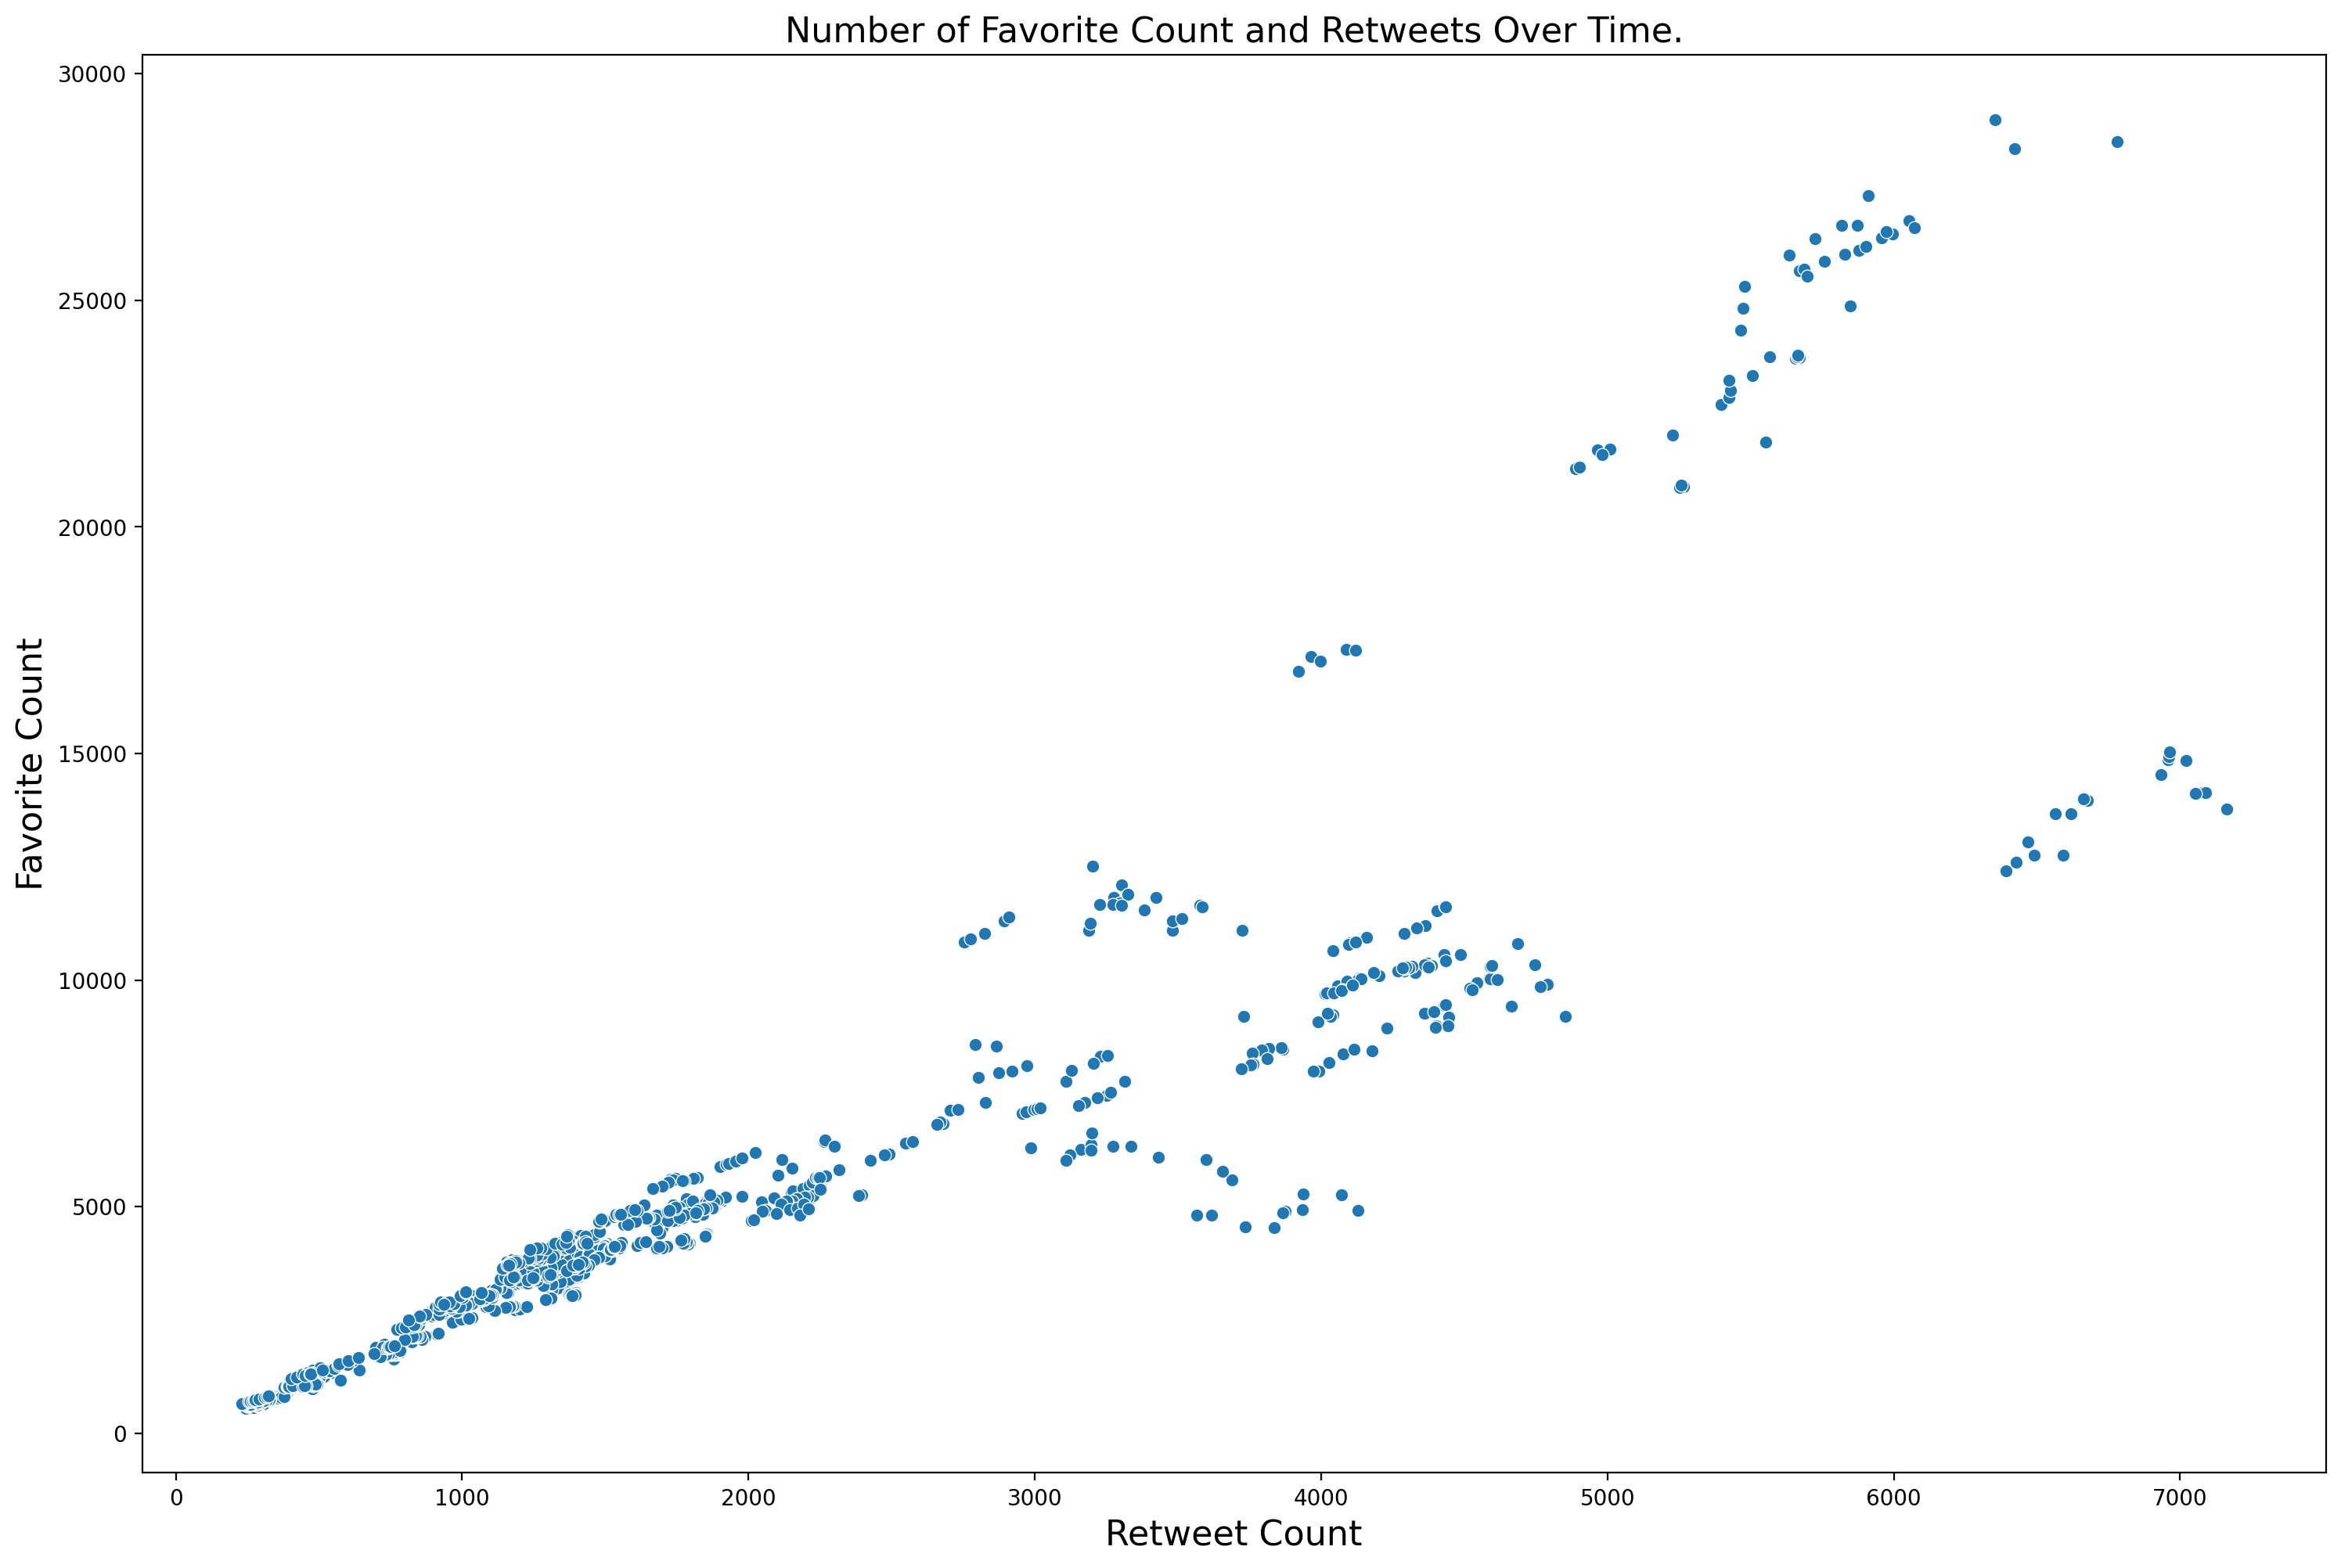

In [127]:
# fig
plt.figure(figsize=(18, 12), dpi=200)
plt.title('Number of Favorite Count and Retweets Over Time.', fontsize=16)
plt.xlabel('Retweet Count', fontsize=16)
plt.ylabel('Favorite Count', fontsize=16)
sns.scatterplot(x=rolling_retweets_count, y=rolling_favourite_count)
plt.savefig('favorite_retweet_count.png');

#### Insight

- Tweets categorized as Doggo,puppo have received the most count on average.
- An increase in retweet count has a direct proportion with an increase in favorite count.
- Moving average makes it easier and cleaner to plot the data.
- The favourite count and retweet count seems to increase over time.